In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat

### Western Electric Rules

Rule 1: Any single data point falls outside the 3σ-limit from the centerline (i.e., any point that falls outside Zone A, beyond either the upper or lower control limit)

In [56]:
#myArr = [1,2,3,3,4,2,5,4]
#myArr = pd.Series(np.random.randint(50, 100, size=100))
myArr = np.random.randint(50, 100, size=100)

In [ ]:
#np.append(myArr,1)

In [50]:
arr_mean = np.mean(myArr)
arr_mean

74.94

In [51]:
flag = [21,22,23,24]

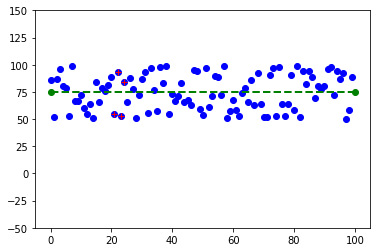

In [52]:
plt.ylim(-50, 150)
plt.plot(myArr,'bo')
plt.plot([0,100],[arr_mean,arr_mean],'go--',linewidth=2)
plt.plot(myArr, color='red',markevery=flag, ls="", marker="+", label="points")
plt.show()

In [33]:
def rando():
    theNum = np.random.randint(50,100)
    return theNum

In [34]:
def testRule1(arr,newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    sigUp = themean + sd*3
    sigDown = themean - sd*3
    if newNum > sigUp:
        print(f"Rule 1 Violation. Upper Control Limit (UCL -- mean + 3SD) is {round(sigUp,1)}")
        proceed(newNum)
    elif newNum < sigDown:
        print(f"Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is {round(sigDown,1)}.")
        proceed(newNum)
    else:
        myArr.append(newNum)
        print("New datum added to list")
        print(f"New array: {myArr}")
    keepOn = input("Continue with monitoring (y/n)? \n")
        
    

In [ ]:
#Need to figure out the order of operators of the formatting
#Rule 1 through 4, return if positive
#Or, could just do a combo of formats
#Fill color, size, marker, and edge
#Maybe have two arrays, a value array with the actual value, and a format array with a format value from 1 to 4,
#corresponding with the rule formatting

In [167]:
def testRule1b(obj,newNum):
    themean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    sigUp = themean + sd*3
    sigDown = themean - sd*3
    if newNum > sigUp or newNum < sigDown:
        obj['format_arr'] = np.append(obj['format_arr'],1)       
        return True
    return

In [158]:
#testing whether there are two out of three consecutive numbers above the line
def testRule2b(obj, newNum):
    themean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    twoSigUp = themean + sd*2
    twoSigDown = themean - sd*2
    temp_clipped = obj['all_vals'][-2:]
    np.append(temp_clipped,newNum)
    above2 = temp_clipped > twoSigUp
    below2 = temp_clipped < twoSigDown
    if (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2):
        obj['format_arr'] = np.append(obj['format_arr'],2)
        return True
    return
    
    

In [153]:
def testRule3b(obj, newNum):
    themean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    oneSigUp = themean + sd
    oneSigDown = themean - sd
    temp_clipped = obj['all_vals'][-5:]
    np.append(temp_clipped,newNum)
    above1 = temp_clipped > oneSigUp
    below1 = temp_clipped < oneSigDown
    if (above1.sum(axis=0) >= 4) or (below1.sum(axis=0) >= 4):
        obj['format_arr'] = np.append(obj['format_arr'],3)
        return True
    return

In [161]:
def testRule4b(obj, newNum):
    theMean = np.mean(obj['all_vals'])
    sd = np.std(obj['all_vals'])
    temp_clipped = obj['all_vals'][-8:]
    np.append(temp_clipped,newNum)
    above = temp_clipped > theMean
    below = temp_clipped < theMean
    if (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9):
        obj['format_arr'] = np.append(obj['format_arr'],4)
        return True
    return

In [173]:
def violations(obj,datum):
    if(testRule1b(trendObj,datum)):
        print(obj['format_arr'])
        return 1
    elif(testRule2b(trendObj,datum)):
        print(obj['format_arr'])
        return 1
    elif(testRule3b(trendObj,datum)):
        print(obj['format_arr'])
        return 1
    elif(testRule4b(trendObj,datum)):
        return 1
        print(obj['format_arr'])
    return 0

In [174]:
def assign_datum(obj,datum):
    if(not violations(obj,datum)):
        obj['format_arr'] = np.append(obj['format_arr'],0)
    obj['all_vals'] = np.append(obj['all_vals'],datum)
    print(obj['format_arr'])
    print(len(obj['format_arr']))
    print(obj['all_vals'])
    print(len(obj['all_vals']))
    return
    

In [168]:
trendObj = {'all_vals':np.random.randint(50, 100, size=100),
            'format_arr':np.zeros(100)
           }


In [169]:
assign_datum(trendObj,130)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]
101
[ 50  51  78  91  52  94  79  71  98  88  52  91  56  82  89  79  94  50
  79  67  55  90  54  80  85  83  79  69  50  84  92  68  64  56  79  61
  78  67  53  62  85  97  72  51  81  80  63  73  96  67  75  50  51  76
  84  80  64  76  81  98  98  85  54  65  86  95  72  64  55  51  95  98
  56  95  97  68  88  56  51  83  82  90  81  87  80  84  76  70  76  77
  84  62  61 

In [126]:
arr = np.array([1,2,3])
np.append(arr,[1])


array([1, 2, 3, 1])

In [127]:
arr

array([1, 2, 3])

In [6]:
def proceed(num):
    while True:
        result = input("Add to data set? (y/n) \n")
        if result.lower() not in ('y','n'):
            print('Sorry, not a valid response')
            continue
        else:
            break
    if result == 'y':
        myArr.append(num)
        print("New datum added to list")
     
    

In [8]:
testRule1(myArr,5)

Rule 1 Violation. Lower Control Limit (LCL mean - 3SD) is 32.0.
Add to data set? (y/n) 
n
Continue with monitoring (y/n)? 
y


In [25]:
keepGoing = True
while keepGoing:
    question = input("Should I keep going? \n")
    if question == 'n':
        print("Ok, thanks for playing!")
        keepGoing = False

Should I keep going? 
y
Should I keep going? 
n
Ok, thanks for playing!


Rule 2: Two out of three consecutive points fall beyond the 2σ-limit (in zone A or beyond), on the same side of the centerline

In [67]:
#testing whether there are two out of three consecutive numbers above the line
def testRule2(arr, newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    twoSigUp = themean + sd*2
    twoSigDown = themean - sd*2
    arr.append(newNum)
    clipped = np.array(arr)[-3:]
    above2 = clipped > twoSigUp
    below2 = clipped < twoSigDown
    print(f'low: {round(twoSigDown,1)}, high: {round(twoSigUp,1)}')
    if (above2.sum(axis=0) >= 2) or (below2.sum(axis=0) >= 2):
        print("Violation")
        print(clipped)
    else:
        print("all good")
    
    

In [68]:
myList = [3,4,3,6,5,4,7,7]

In [69]:
testRule2(myList, 20)

low: 1.6, high: 8.2
all good


In [ ]:
#myArr = [1,2,3,3,4,2,5,4]
myArr = list(np.random.randint(50, 100, size=100))

Rule 3: Four out of five consecutive points fall beyond the 1σ-limit (in zone B or beyond), on the same side of the centerline.

In [78]:
def testRule3(arr, newNum):
    themean = stat.mean(arr)
    sd = stat.stdev(arr)
    oneSigUp = themean + sd
    oneSigDown = themean - sd
    arr.append(newNum)
    clipped = np.array(arr)[-5:]
    above2 = clipped > oneSigUp
    below2 = clipped < oneSigDown
    print(f'low: {round(oneSigDown,1)}, high: {round(oneSigUp,1)}')
    if (above2.sum(axis=0) >= 4) or (below2.sum(axis=0) >= 4):
        print("Violation")
        print(clipped)
    else:
        print("all good")

In [83]:
rule3List = [3,4,3,6,5,4,7,7,8,10,15,10,10,15]

In [84]:
testRule3(rule3List,15)

low: 3.7, high: 11.6
all good


Rule 4	NINE consecutive points fall on the same side of the centerline (in zone C or beyond)

In [98]:
def testRule4(arr, newNum):
    theMean = stat.mean(arr)
    sd = stat.stdev(arr)
    arr.append(newNum)
    clipped = np.array(arr)[-9:]
    above = clipped > theMean
    below = clipped < theMean
    print(f'mean:{round(theMean,1)}')
    if (above.sum(axis=0) >= 9) or (below.sum(axis=0) >= 9):
        print("Violation")
        print(clipped)
    else:
        print("all good")

In [103]:
rule4List = [3,4,3,6,5,4,7,7,8,10,15,10,10,15,15,15,15,15]

In [104]:
testRule4(rule4List,15)

mean:9.3
Violation
[15 10 10 15 15 15 15 15 15]
